## <font color=blue>  Homework #3: Querying and plotting Multivariate data </font>

## Total Points  : 80  
### <font color=red> Due: Tuesday 03/29/2022 11:59 PM </font>
### Objective : Assess your ability to use multivariate data plotting techniques

#### Skills needed:  In this homework assignment, you'll be using the concepts you've learned to
1. Edit and run  Jupyter notebooks
2. Write Python code using `Pandas` and `Matplotlib` packages to :
    * import the Pandas and matplotlib packages
    * read dataset from file into Pandas dataframe
    * index and query the dataframe 
    * Use color maps
    * Map data values to visual variables (colors, sizes, shapes, etc.)
    * sort dataframe according to a column values
    * Make visiuals using bar and Pie plots with multiple variables 
    * Use subplots to create juxtaposed multiple displays

***
Please type your name below

## <font color=Blue> Your Name: Bradley Kai</font>

***

## Requirements & Submission:
1. Use this notebook as a template for your answers. Then rename it and submitted as ipynb (jupyter notebook) 
2. Submit on WTClass (“Resources >> Assignments >> Homework#3 
3. The file name must be your ``first name``+ "-"+ ``Last name`` followed by "-HW3.ipynb".
4. Each task's answer must be after the task description
5. Answers and explainations must be properly formatted in the properiate Cell type
8. You can add as many cells as you needed
9. You should submit final ***clean version*** of your notebook, i.e. remove any experimenting cells


### Grading <font color = purple> [80 points] </font>
1. This assignment contains 3 required tasks (80 total points) 
    * Task 1: reading the data,  has 10 points
    * Task 2: Making Multiple pie-charts using subplots,  has 35 points
    * Task 3: Making multiple Bar plots using subplots, has 35 points
    
1. You'll earn full points for each command that gives the desired output if it follow the rules
2. Non-executable commands will get 0 points
3. Partial credit will be given for executable non-complete tasks

### <font color = darkred> Task 1-[10 points]</font>:<font color=blue> Reading the dataset</font>
Import needed libraries and Read the attached csv file (`SalesTotalByRegion.csv`) into a dataframe named as `SalesData`. This dataset shows the total sales of 4 beverage categories (`'Tea', 'Espresso','Coffee','Herbal Tea'`) across 4 regions (`'West','Central','East','South'`).

### <font color=Green> Task 1 Answer: </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SalesData = pd.read_csv("SalesTotalByRegion.csv",sep=',',engine='python')

In [3]:
SalesData

,Region,Tea,Espresso,Coffee,Herbal Tea
0,West,35338,34200,28306,35391
1,Central,33451,29206,33808,33215
2,East,15745,23672,27740,20241
3,South,0,22008,16280,12558


---------------

### <font color = darkred>Task 2-[35 points]</font>  :<font color=blue> Make Pie plots of the variables of the dataset using multiple Juxtaposed displays:</font> 
Using the dataframe  `SalesData`  write Python code to show the percentage of each category sales in each region as shown in the figure below.

* Your plot must have all the componenet in the figure below (i.e. titles, lables, legends, text, etc.)
* You must use subplot/sublots to make the juxtaposed plots in the given arrangement 
* it is up to you to choose the appropriate figure size, colors, and other properties.

<img src="Task2Fig.jpg" width="750" height="250">

### <font color=Green> Task 2 Answer: </font>

In [4]:
# colors
colors = ['peachpuff','pink','palegreen','lightskyblue']

# cut out region column for calculation
noRegion = SalesData.iloc[:,[1,2,3,4]]

# sum totals for each category column
salesTotal = np.sum(noRegion,axis=1).tolist()

# add new column with sales totals for each region
SalesData['Total Sales'] = salesTotal

# create lists to hold % values
wlist = []
clist = []
elist = []
slist = []

# run for loop across rows to calculate element value by Total Sales to get percentage
# west
westRow = noRegion.iloc[0,:].tolist()
for i in westRow:
    ans = i / SalesData.iloc[0,5]
    wlist.append(ans)
    
# central
centralRow = noRegion.iloc[1,:].tolist()
for i in centralRow:
    ans = i / SalesData.iloc[1,5]
    clist.append(ans)
    
# east
eastRow = noRegion.iloc[2,:].tolist()
for i in eastRow:
    ans = i / SalesData.iloc[2,5]
    elist.append(ans)
    
# south
southRow = noRegion.iloc[3,:].tolist()
for i in southRow:
    ans = i / SalesData.iloc[3,5]
    slist.append(ans)

# add columns generated from for loop lists
data = {'Tea':[1,2,3,4],'Espresso':[1,2,3,4],'Coffee':[1,2,3,4],'Herbal Tea':[1,2,3,4]}

# cleaner to just create a new df
pct = pd.DataFrame(data)

i = 0
while i < 4:
    j = 0
    while j < 4:
        if i == 0:
            pct.iloc[i,j] = wlist[j]
        elif i== 1:
            pct.iloc[i,j] = clist[j]
        elif i== 2:
            pct.iloc[i,j] = elist[j]
        elif i==3:
            pct.iloc[i,j] = slist[j]
        else:
            print("Something broke")
        j+=1
    i+=1
    

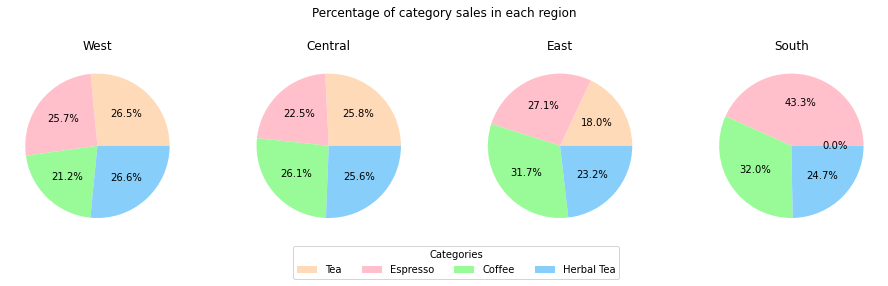

In [5]:
#create subplot
fig = plt.figure(figsize = (13,10))

# west pie
wplot = plt.subplot(4,4,1)
w = wplot.pie(pct[:].iloc[0],colors=colors,autopct='%1.1f%%')
wplot.set_title("West")

# central pie
cplot = plt.subplot(4,4,2)                      
c = cplot.pie(pct[:].iloc[1],colors=colors,autopct='%1.1f%%')
cplot.set_title("Central")

# east pie
eplot = plt.subplot(4,4,3)                      
e = eplot.pie(pct[:].iloc[2],colors=colors,autopct='%1.1f%%')
eplot.set_title("East")

# south pie
splot = plt.subplot(4,4,4)                      
s = splot.pie(pct[:].iloc[3],colors=colors,autopct='%1.1f%%')
splot.set_title("South")

# adjust position of subplots
fig.tight_layout(rect=[0,-0.15,1,0.95])

#title
plt.suptitle("Percentage of category sales in each region")

# legend
plt.legend(title="Categories",labels=pct.loc[:,],ncol=4,borderaxespad=10, bbox_to_anchor=[0.1,0.5])

# show subplots
plt.show()


### <font color = darkred>Task 3-[35 points]</font>  :<font color=blue> Make bar plots of the variables of the dataset using multiple Juxtaposed displays:</font> 
Using the dataframe  `SalesData`  write Python code to show the total sales of each category in each region as shown in the figure below.

* Your plot must have all the componenet in the figure below (i.e. titles, lables, text, etc.)
* You must use subplot/sublots to make the juxtaposed plots in the given arrangement, and make them share the y axis lables on the left subblot 
* it is up to you to choose the appropriate figure size, colors, and other properties.

<img src="Task3Fig.jpg" width="780" height="300">

## <font color=Green> Task 3 Answer: </font>

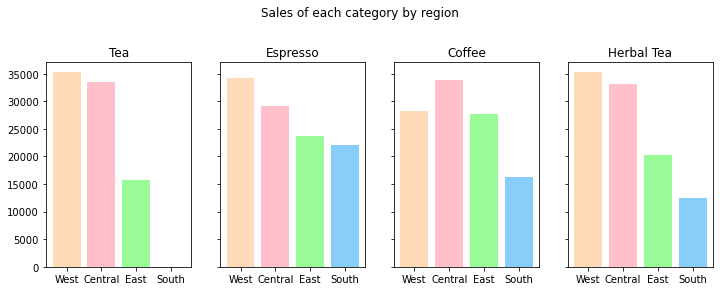

In [6]:
# create subplot
fig, subplts = plt.subplots(1,4, figsize = (10.5,4), sharey='row')
cols = SalesData.columns

# flatten for for loop
mysubplts = subplts.flatten()

# for loop to create bar subplots
for i in [1,2,3,4]:
    subplt = plt.subplot(1,4,i)
    sbar=subplt.bar(SalesData['Region'],SalesData.loc[:,cols[i]],color=colors)
    subplt.set_title(cols[i])

# space 2.5    
fig.tight_layout(pad = 2.5)

# title
fig.suptitle("Sales of each category by region",y=1.05)

# show plot
plt.show()